Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

age — возраст
sex — пол (1 - мужчина, 0 - женщина)
cp — тип боли в груди (4 значения)
trestbps — артериальное давление в покое
chol — холестерин сыворотки в мг/дл
fbs — уровень сахара в крови натощак > 120 мг/дл
restecg — результаты электрокардиографии в покое (значения 0,1,2)
thalach — достигнута максимальная частота сердечных сокращений
exang — стенокардия, вызванная физической нагрузкой
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
slope — наклон пикового сегмента ST при нагрузке
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [56]:
import pandas as pd
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [57]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [58]:
# создать новый бинарный признак old и присвоить ему 1 в случае, при возрасте пациента более 60 лет, иначе — 0
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [59]:
print(heart['old'].sum())

79


Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

Возраст Мужчины	Женщины
 (лет)	
до 20	123/76	116/72
21-30	126/79	120/75
31-40	129/81	127/80
41-50	135/83	137/84
51-60	142/85	144/85
61 и    142/80	159/85
старше	
В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [60]:
def get_trestbps(row):
    if row['sex'] == 1:
        if row['age'] <= 20:
            return  '123'
        elif row['age'] > 20 and row['age'] <= 30:
            return  '126'
        elif row['age'] > 30 and row['age'] <= 40:
            return  '129'
        elif row['age'] > 40 and row['age'] <= 50:
            return  '135'
        elif row['age'] > 50 and row['age'] <= 60:
            return  '142'
        return  '142'
    else:
        if row['age'] <= 20:
            return  '116'
        elif row['age'] > 20 and row['age'] <= 30:
            return  '120'
        elif row['age'] > 30 and row['age'] <= 40:
            return  '127'
        elif row['age'] > 40 and row['age'] <= 50:
            return  '137'
        elif row['age'] > 50 and row['age'] <= 60:
            return  '144'
        return  '159'
        
heart['trestbps_mean'] = heart[['sex','age']].apply(get_trestbps, axis=1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


Данный код выполняет следующие действия:

1. Определяется функция `get_trestbps`, которая принимает строку (запись) из датафрейма `heart` в качестве аргумента.

2. Внутри функции проверяется значение пола пациента (`row['sex']`). Если пол равен 1 (мужчина), то выполняются условия для мужчин, иначе (пол не равен 1, то есть женщина) выполняются условия для женщин.

3. В каждом условии проверяется возраст пациента (`row['age']`) и возвращается соответствующее значение систолического давления в формате "верхнее/нижнее значение" (например, "123/76").

4. После определения функции `get_trestbps`, она применяется к столбцам 'sex' и 'age' датафрейма `heart` с помощью метода `apply` и параметра `axis=1`. Это означает, что функция будет применяться построчно (для каждой записи) вдоль оси 1 (горизонтальная ось).

5. Результат применения функции `get_trestbps` для каждой строки записывается в новый столбец 'trestbps_mean' датафрейма `heart`.

In [61]:
heart.loc[300, 'trestbps_mean']

'142'

Задание 8.5

Закодируйте нижеуказанные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.
cp
restecg
slope
ca
thal

Сколько признаков получилось в датасете?

In [62]:
# Импортируем библиотеку category-encoders для дальнейшего использования
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart_encoded = pd.concat([heart, type_bin], axis=1)
heart_encoded_clean = heart_encoded.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)
heart_encoded_clean

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


Данный код выполняет следующие действия:

1. Импортируется библиотека `category_encoders` под псевдонимом `ce`. `category_encoders` предоставляет различные методы для кодирования категориальных признаков.

2. Создается экземпляр класса `OneHotEncoder` из модуля `category_encoders`. Этот класс используется для преобразования категориальных признаков в бинарные (one-hot encoding).

3. В строке `encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])` создается объект `encoder`, который будет использоваться для кодирования столбцов `'cp'`, `'restecg'`, `'slope'`, `'ca'` и `'thal'` в датафрейме `heart`.

4. Строка `type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])` применяет метод `fit_transform` объекта `encoder` к выбранным столбцам датафрейма `heart`. Этот метод выполняет обучение кодировщика на основе данных и применяет его к выбранным столбцам, возвращая новый датафрейм `type_bin` с преобразованными значениями.

5. В строке `heart_encoded = pd.concat([heart, type_bin], axis=1)` выполняется объединение исходного датафрейма `heart` и нового датафрейма `type_bin` по горизонтальной оси (axis=1). Это приводит к созданию нового датафрейма `heart_encoded`, содержащего исходные признаки и новые бинарные признаки.

6. В строке `heart_encoded_clean = heart_encoded.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)` выполняется удаление столбцов `'cp'`, `'restecg'`, `'slope'`, `'ca'` и `'thal'` из датафрейма `heart_encoded`. Результат сохраняется в новом датафрейме `heart_encoded_clean`.

Задание 8.6
Нормализуйте все числовые признаки подходящим способом.
В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [63]:
heart_encoded_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    object 
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

In [64]:
# вывоим список числовых признаков датафрейма heart_encoded_clean
numerical_features = heart_encoded_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_features)

['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'target', 'old', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2', 'restecg_3', 'slope_1', 'slope_2', 'slope_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'ca_5', 'thal_1', 'thal_2', 'thal_3', 'thal_4']


<Axes: title={'center': 'Распределения до нормализации'}, xlabel='age', ylabel='Density'>

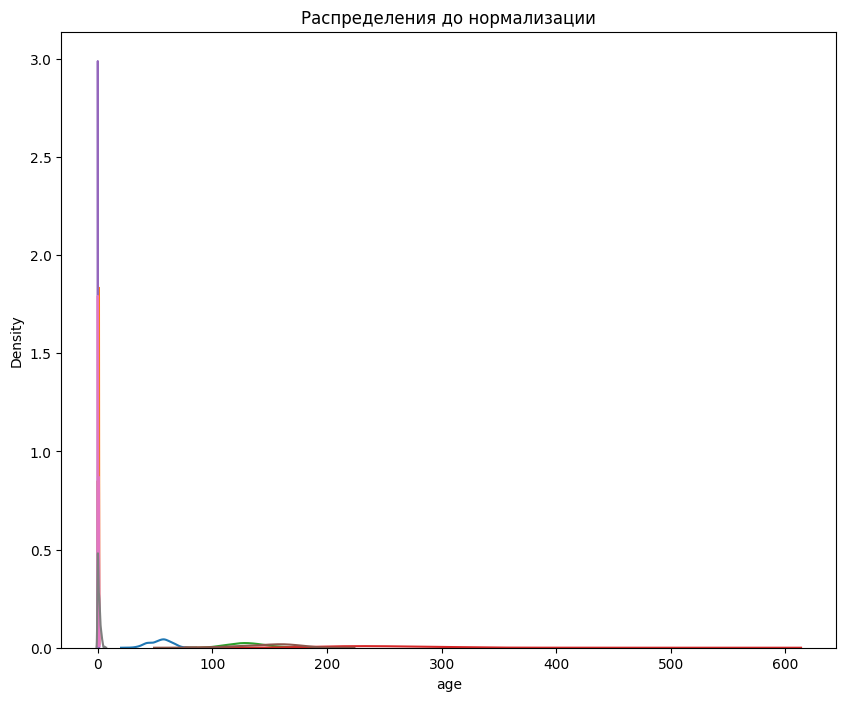

In [65]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения до нормализации')

sns.kdeplot(heart_encoded_clean['age'], ax=ax1)
sns.kdeplot(heart_encoded_clean['sex'], ax=ax1)
sns.kdeplot(heart_encoded_clean['trestbps'], ax=ax1)
sns.kdeplot(heart_encoded_clean['chol'], ax=ax1)
sns.kdeplot(heart_encoded_clean['fbs'], ax=ax1)
sns.kdeplot(heart_encoded_clean['thalach'], ax=ax1)
sns.kdeplot(heart_encoded_clean['exang'], ax=ax1)
sns.kdeplot(heart_encoded_clean['oldpeak'], ax=ax1)


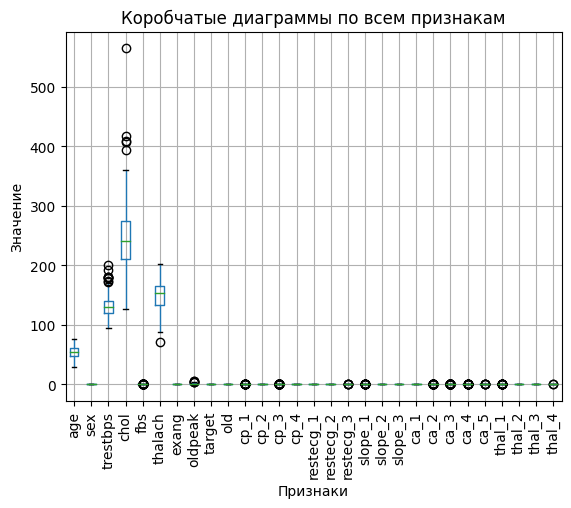

In [66]:
# Построение коробчатых диаграмм
heart_encoded_clean.boxplot(rot=90)

# Настройка осей и заголовка
plt.xlabel('Признаки')
plt.ylabel('Значение')
plt.title('Коробчатые диаграммы по всем признакам')

# Отображение диаграммы
plt.show()

Этот код построит коробчатые диаграммы для всех численных признаков в датафрейме `heart_encoded_clean`. Функция `boxplot` автоматически разделяет данные по столбцам и создает коробки, усики и выбросы для каждого признака. Функция `rot=90` используется для поворота названий признаков на 90 градусов, чтобы они были легко читаемыми.
По получившемуся графику видно, что датафрейме `heart_encoded_clean` есть данные со значительными выбросами, например по показаелю 'chol', значит для нормализации числовых признаков нужен метод RobustScaler который в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

# для нормализации, стандартизации
from sklearn import preprocessing

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(heart_encoded_clean.columns)

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart_encoded_clean)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['age'], ax=ax1)
sns.kdeplot(df_r['sex'], ax=ax1)
sns.kdeplot(df_r['trestbps'], ax=ax1)
sns.kdeplot(df_r['chol'], ax=ax1)
sns.kdeplot(df_r['fbs'], ax=ax1)
sns.kdeplot(df_r['thalach'], ax=ax1)
sns.kdeplot(df_r['exang'], ax=ax1)
sns.kdeplot(df_r['oldpeak'], ax=ax1)

In [67]:
from sklearn.preprocessing import RobustScaler

# Создание экземпляра класса RobustScaler
scaler = RobustScaler()

# Нормализация числовых признаков
heart_encoded_clean[['chol']] = scaler.fit_transform(heart_encoded_clean[['chol']])

# Вывод стандартного отклонения признака chol
std_chol = heart_encoded_clean['chol'].std()

# Округление стандартного отклонения до шести знаков после запятой
std_chol_rounded = round(std_chol, 6)

print("Стандартное отклонение признака chol:", std_chol_rounded)

Стандартное отклонение признака chol: 0.816232
